In [1]:
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#imports for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector, TimeDistributed

In [2]:
sub1_train = scipy.io.loadmat('sub1_comp.mat')
sub1_test = scipy.io.loadmat('sub1_testlabels.mat')
sub2_train = scipy.io.loadmat('sub2_comp.mat')
sub2_test = scipy.io.loadmat('sub2_testlabels.mat')
sub3_train = scipy.io.loadmat('sub3_comp.mat')
sub3_test = scipy.io.loadmat('sub3_testlabels.mat')

In [3]:
sub1_x_train=pd.DataFrame(sub1_train['train_data'])
sub1_y_train=pd.DataFrame(sub1_train['train_dg'])
sub1_x_test=pd.DataFrame(sub1_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub2_x_train=pd.DataFrame(sub2_train['train_data'])
sub2_y_train=pd.DataFrame(sub2_train['train_dg'])
sub2_x_test=pd.DataFrame(sub2_train['test_data'])
sub2_y_test=pd.DataFrame(sub2_test['test_dg'])

sub3_x_train=pd.DataFrame(sub3_train['train_data'])
sub3_y_train=pd.DataFrame(sub3_train['train_dg'])
sub3_x_test=pd.DataFrame(sub3_train['test_data'])
sub3_y_test=pd.DataFrame(sub3_test['test_dg'])

In [4]:
sub2_x_train

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-872,164,609,-4169,-3011,-1713,-1561,-616,-700,3692,...,961,-1881,-2825,-113,-495,76,2439,-2776,-7720,-96
1,-1191,-78,454,-4212,-3018,-1808,-1778,-597,-682,3733,...,916,-2019,-2935,-249,-700,-9,2380,-2787,-7544,-188
2,-1507,-395,204,-4429,-3134,-2046,-2065,-630,-826,3654,...,750,-2146,-3158,-437,-976,-218,2246,-2871,-7425,-418
3,-1670,-561,25,-4655,-3214,-2234,-2258,-602,-1037,3572,...,660,-2241,-3400,-551,-1151,-546,2111,-2931,-7292,-591
4,-1734,-625,-83,-4839,-3231,-2294,-2355,-535,-1269,3452,...,628,-2407,-3681,-645,-1248,-917,1955,-3040,-7180,-679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,1600,3973,750,-885,-3863,3614,1392,-56,-1149,-3257,...,-7864,231,-941,828,2240,1387,-1444,1699,1602,-1186
399996,1378,3899,734,-922,-3891,3480,1145,-187,-1250,-3161,...,-7796,303,-995,717,2296,1291,-1338,1664,1554,-1295
399997,1357,3948,837,-831,-3848,3476,1026,-158,-1244,-2972,...,-7609,563,-906,795,2475,1393,-1067,1711,1615,-1276
399998,1491,4032,906,-729,-3831,3502,930,-89,-1231,-2804,...,-7450,805,-787,934,2667,1657,-801,1710,1662,-1235


<Axes: >

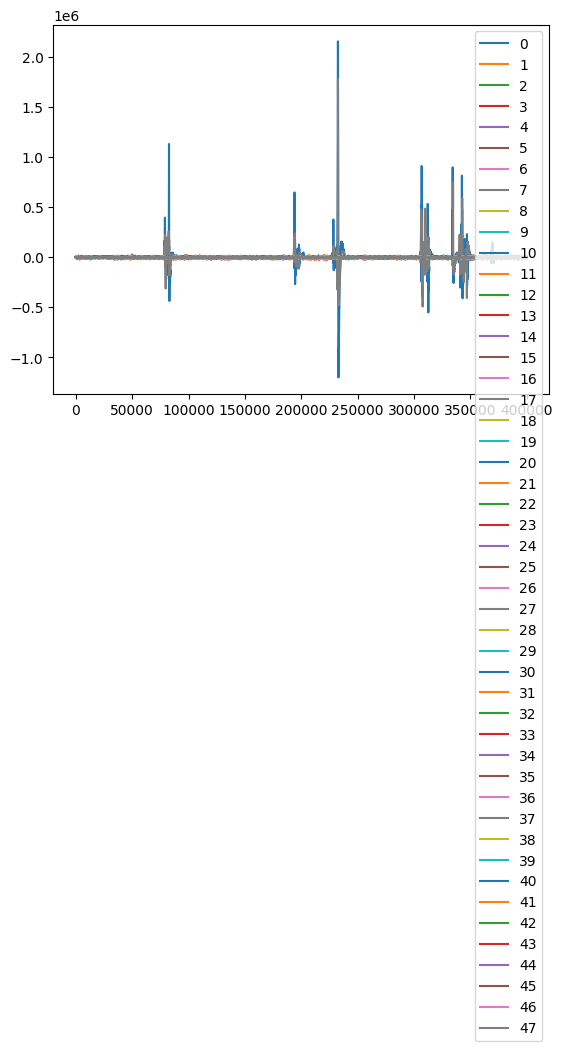

In [5]:
sub2_x_train.plot()

In [5]:
sub2_x_train_Q1 = sub2_x_train.quantile(0.25)
sub2_x_train_Q3 = sub2_x_train.quantile(0.75)
IQR = sub2_x_train_Q3 - sub2_x_train_Q1
sub2_x_train_final = sub2_x_train[~((sub2_x_train < (sub2_x_train_Q1 - 1.5 * IQR)) |(sub2_x_train > (sub2_x_train_Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
#instead of removing the outliers by IQR cap them to the IQR
sub2_x_train_final = sub2_x_train.clip(sub2_x_train_Q1 - 1.5 * IQR, sub2_x_train_Q3 + 1.5 * IQR, axis = 1)

sub2_x_train_final

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-872,164.0,609.0,-4169,-3011.0,-1713.0,-1561,-616.0,-700.0,3692,...,961.0,-1881.0,-2825,-113,-495,76,2439.0,-2776.0,-6877.5,-96
1,-1191,-78.0,454.0,-4212,-3018.0,-1808.0,-1778,-597.0,-682.0,3733,...,916.0,-2019.0,-2935,-249,-700,-9,2380.0,-2787.0,-6877.5,-188
2,-1507,-395.0,204.0,-4429,-3134.0,-2046.0,-2065,-630.0,-826.0,3654,...,750.0,-2146.0,-3158,-437,-976,-218,2246.0,-2871.0,-6877.5,-418
3,-1670,-561.0,25.0,-4655,-3214.0,-2234.0,-2258,-602.0,-1037.0,3572,...,660.0,-2241.0,-3400,-551,-1151,-546,2111.0,-2931.0,-6877.5,-591
4,-1734,-625.0,-83.0,-4839,-3231.0,-2294.0,-2355,-535.0,-1269.0,3452,...,628.0,-2407.0,-3681,-645,-1248,-917,1955.0,-3040.0,-6877.5,-679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,1600,3973.0,750.0,-885,-3863.0,3614.0,1392,-56.0,-1149.0,-3257,...,-7864.0,231.0,-941,828,2240,1387,-1444.0,1699.0,1602.0,-1186
399996,1378,3899.0,734.0,-922,-3891.0,3480.0,1145,-187.0,-1250.0,-3161,...,-7796.0,303.0,-995,717,2296,1291,-1338.0,1664.0,1554.0,-1295
399997,1357,3948.0,837.0,-831,-3848.0,3476.0,1026,-158.0,-1244.0,-2972,...,-7609.0,563.0,-906,795,2475,1393,-1067.0,1711.0,1615.0,-1276
399998,1491,4032.0,906.0,-729,-3831.0,3502.0,930,-89.0,-1231.0,-2804,...,-7450.0,805.0,-787,934,2667,1657,-801.0,1710.0,1662.0,-1235


<Axes: >

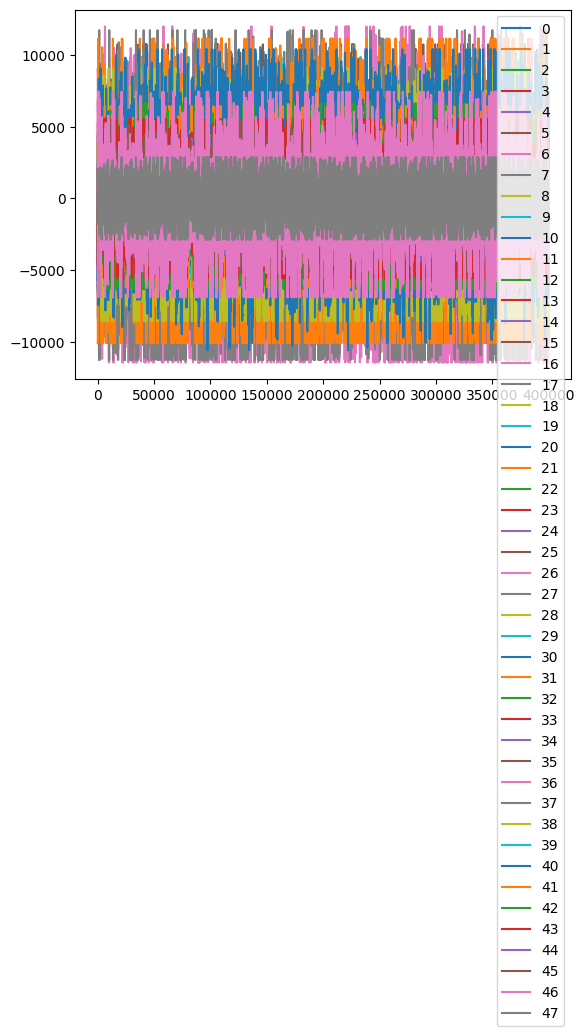

In [8]:
sub2_x_train_final.plot()

In [7]:
sub2_x_train_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,68.482893,35.624407,0.959729,-20.721038,56.847890,113.949044,-2.655248,0.491001,-3.514626,193.866588,...,69.506772,133.428136,-12.636485,23.642715,57.762870,-11.566770,66.226875,73.277074,188.394664,2.349535
std,3358.218456,2770.857151,2465.084032,2044.290856,2306.193388,4336.621170,1932.218058,1970.463319,1398.730915,4247.636331,...,3630.499822,2626.871998,3728.778595,2543.420416,2627.138592,2107.717295,1877.624568,2218.624140,3121.588234,1076.146584
min,-8109.000000,-6918.500000,-6639.500000,-5195.000000,-5458.500000,-10060.500000,-4962.000000,-5308.500000,-3723.500000,-9032.000000,...,-8541.500000,-5996.500000,-10571.000000,-6198.000000,-6321.000000,-5559.000000,-4370.500000,-5174.500000,-6877.500000,-2855.000000
25%,-1911.000000,-1679.000000,-1640.000000,-1373.000000,-1251.000000,-2268.000000,-1248.000000,-1314.000000,-935.000000,-1955.000000,...,-1949.000000,-1396.000000,-2717.000000,-1464.000000,-1470.000000,-1401.000000,-1024.000000,-1198.000000,-1518.000000,-710.000000
50%,148.000000,67.000000,41.000000,-191.000000,229.000000,487.000000,3.000000,4.000000,-11.000000,409.000000,...,318.000000,110.000000,-378.000000,170.000000,214.000000,-27.000000,69.000000,149.000000,241.000000,11.000000
75%,2221.000000,1814.000000,1693.000000,1175.000000,1554.000000,2927.000000,1228.000000,1349.000000,924.000000,2763.000000,...,2446.000000,1671.000000,2519.000000,1692.000000,1764.000000,1371.000000,1207.000000,1453.000000,2055.000000,720.000000
max,8419.000000,7053.500000,6692.500000,4997.000000,5761.500000,10719.500000,4942.000000,5343.500000,3712.500000,9840.000000,...,9038.500000,6271.500000,10373.000000,6426.000000,6615.000000,5529.000000,4553.500000,5429.500000,7414.500000,2865.000000


In [8]:
#do the same with the test data
sub2_x_test_Q1 = sub2_x_test.quantile(0.25)
sub2_x_test_Q3 = sub2_x_test.quantile(0.75)
IQR = sub2_x_test_Q3 - sub2_x_test_Q1
sub2_x_test_final = sub2_x_test[~((sub2_x_test < (sub2_x_test_Q1 - 1.5 * IQR)) |(sub2_x_test > (sub2_x_test_Q3 + 1.5 * IQR))).any(axis=1)]
#clip outliers
sub2_x_test_final = sub2_x_test.clip(sub2_x_test_Q1 - 1.5 * IQR, sub2_x_test_Q3 + 1.5 * IQR, axis = 1)
sub2_x_test_final

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,2172,4046,1121,-568,-3700.0,3501.0,806.0,237,-1200.0,-2399,...,-7134,849,-490,1344.0,3029.0,2337,-210.0,1697,1604.0,-999
1,2596,4023,1212,-518,-3601.0,3570.0,720.0,275,-1112.0,-2185,...,-6977,689,-277,1514.0,3230.0,2587,99.0,1682,1593.0,-875
2,2982,4056,1290,-450,-3494.0,3688.0,655.0,207,-932.0,-1964,...,-6846,570,-52,1634.0,3383.0,2799,407.0,1653,1606.0,-810
3,3321,4110,1370,-347,-3353.0,3844.0,697.0,145,-716.0,-1773,...,-6723,600,176,1764.0,3485.0,2961,777.0,1663,1654.0,-767
4,3531,4029,1343,-308,-3235.0,3946.0,734.0,24,-621.0,-1734,...,-6616,613,256,1825.0,3473.0,2950,1113.0,1586,1632.0,-803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,51,1995,-1154,-2933,-391.0,970.0,511.0,-407,-1391.0,-2147,...,182,-1981,-1953,-1031.0,370.0,2270,1189.0,-814,-624.0,-143
199996,-215,1841,-1211,-3123,-422.0,1015.0,438.0,-748,-1759.0,-2275,...,-82,-2017,-2121,-1258.0,288.0,2150,1099.0,-982,-1003.0,-298
199997,-423,1793,-1212,-3310,-438.0,1117.0,402.0,-940,-2028.0,-2337,...,-296,-2138,-2259,-1470.0,201.0,2067,946.0,-1207,-1266.0,-432
199998,-460,1978,-1144,-3334,-323.0,1326.0,480.0,-857,-2041.0,-2230,...,-339,-2178,-2207,-1496.0,235.0,2163,910.0,-1330,-1278.0,-353


<Axes: >

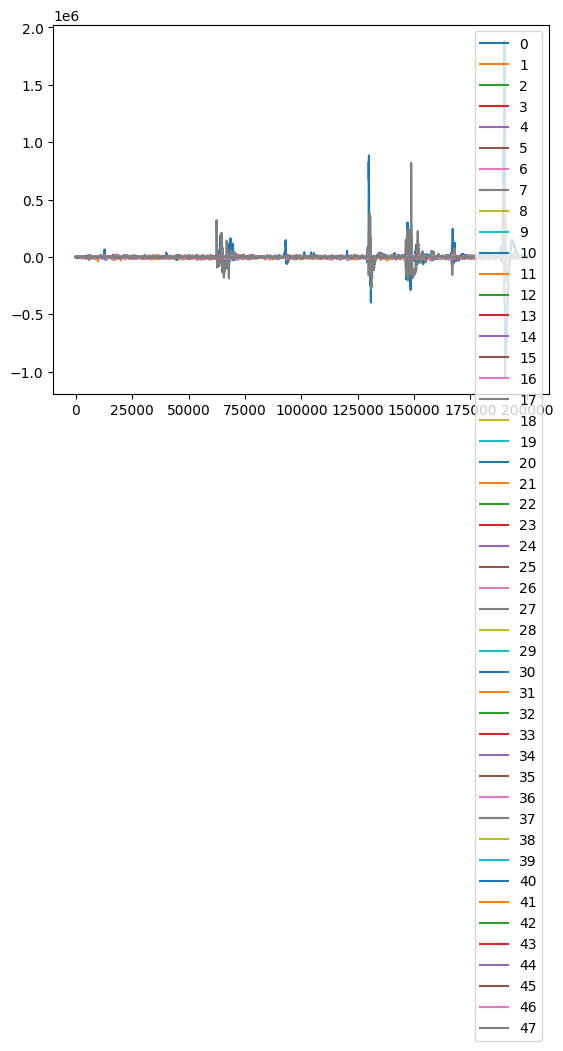

In [11]:
sub2_x_test.plot()

<Axes: >

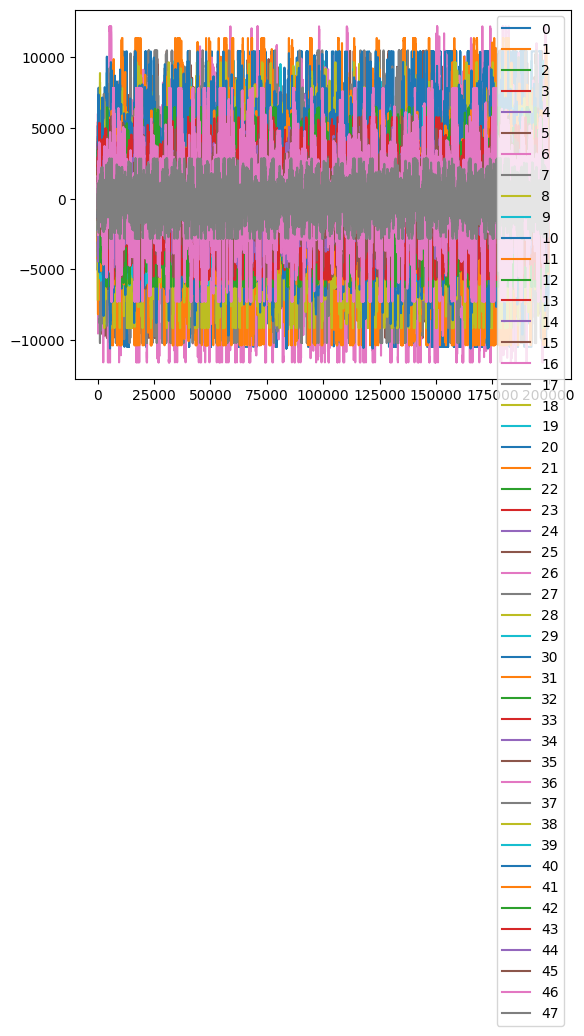

In [12]:
sub2_x_test_final.plot()

In [9]:
sub2_y_test

,0,1,2,3,4
0,0.060250,-0.115182,-0.051467,-0.315159,-0.249496
1,0.060250,-0.115181,-0.051475,-0.315159,-0.249496
2,0.060250,-0.115181,-0.051484,-0.315159,-0.249496
3,0.060250,-0.115180,-0.051494,-0.315159,-0.249496
4,0.060250,-0.115179,-0.051504,-0.315159,-0.249496
...,...,...,...,...,...
199995,-0.015468,-0.160393,-0.058296,0.539060,-0.081450
199996,-0.015206,-0.157843,-0.057182,0.534678,-0.080268
199997,-0.014945,-0.155295,-0.056077,0.530152,-0.079083
199998,-0.014684,-0.152749,-0.054979,0.525487,-0.077896


In [10]:
#train a linear regression model on x_train_final and y_train and then find correlation with final y_test
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(sub2_x_train_final, sub2_y_train)
y_pred = regressor.predict(sub2_x_test_final)
y_pred_df=pd.DataFrame(y_pred)
y_pred_df 

,0,1,2,3,4
0,-0.071106,-0.216732,0.179779,-0.249914,-0.213940
1,-0.070191,-0.188579,0.196001,-0.237382,-0.206964
2,-0.063980,-0.170369,0.205730,-0.229602,-0.206434
3,-0.056501,-0.171306,0.201536,-0.232717,-0.211853
4,-0.045636,-0.187949,0.199385,-0.233753,-0.218474
...,...,...,...,...,...
199995,-0.061747,-0.312636,0.290738,-0.322205,-0.328519
199996,-0.048884,-0.312448,0.293953,-0.321828,-0.329858
199997,-0.051917,-0.320396,0.279248,-0.325128,-0.336055
199998,-0.068398,-0.333983,0.250027,-0.331887,-0.346538


In [11]:
#find correlation between y_pred and y_test
from scipy.stats import pearsonr

array1=np.array(sub2_y_test)
array2=np.array(y_pred_df)

corr, _ = pearsonr(array1.flatten(), array2.flatten())
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.005
